In [7]:
import pandas as pd
import numpy as np
from scipy.linalg import lstsq

df = pd.read_csv("Algerian_forest_fires_dataset_CLEANED.csv")

df = df.drop(['day', 'month', 'year'], axis=1)

# All valid predictive features + Region
features = ['Region', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC',  'ISI']
X = df[features].values
y = df['FWI'].values

X = np.column_stack([np.ones(len(y)), X])   
coef, residuals, rank, s = lstsq(X, y)

rss = residuals.item() if isinstance(residuals, np.ndarray) else residuals

# Predictions
y_pred = X @ coef

ss_tot = np.sum((y - y.mean())**2)
ss_res = np.sum((y - y_pred)**2)

n, p = X.shape  


# MSE
mse = ss_res / n

print("Multiple Linear Regression on FWI (All Correct Features)\n")
print(f"{'Feature':<15} {'Coefficient':>12}")
print("-" * 30)
print(f"{'Intercept':<15} {coef[0]:>12.4f}")
for feat, c in zip(features, coef[1:]):
    print(f"{feat:<15} {c:>12.4f}")


print(f"MSE             : {mse:.4f}")
print(f"Root MSE        : {np.sqrt(mse):.4f}")

Multiple Linear Regression on FWI (All Correct Features)

Feature          Coefficient
------------------------------
Intercept             0.7450
Region               -0.7856
Temperature          -0.0036
RH                    0.0010
Ws                    0.0054
Rain                 -0.0004
FFMC                 -0.0423
DMC                   0.2885
ISI                   1.2017
MSE             : 1.5408
Root MSE        : 1.2413


In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')

df = df.drop(['day', 'month', 'year'], axis=1)

features = ['Region', 'Temperature', 'RH', 'Ws', 'Rain',
            'FFMC', 'DMC', 'ISI']

X = df[features].values
y = df['FWI'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

train_r2  = r2_score(y_train, y_train_pred)
test_r2   = r2_score(y_test,  y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test,  y_test_pred))

print("Scikit-learn Linear Regression – FWI Prediction")
print("="*52)
print(f"{'Feature':<15} {'Coefficient':>12}")
print("-"*34)
print(f"{'Intercept':<15} {model.intercept_:>12.4f}")
for f, c in zip(features, model.coef_):
    print(f"{f:<15} {c:>12.4f}")

print("\nPerformance")
print("-"*34)
print(f"Train R²        : {train_r2:.6f}")
print(f"Test  R²        : {test_r2:.6f}")
print(f"Train RMSE      : {train_rmse:.4f}")
print(f"Test  RMSE      : {test_rmse:.4f}")

Scikit-learn Linear Regression – FWI Prediction
Feature          Coefficient
----------------------------------
Intercept             0.9957
Region               -0.8241
Temperature          -0.0178
RH                   -0.0013
Ws                    0.0026
Rain                 -0.0043
FFMC                 -0.0358
DMC                   0.2871
ISI                   1.1852

Performance
----------------------------------
Train R²        : 0.968745
Test  R²        : 0.989850
Train RMSE      : 1.3548
Test  RMSE      : 0.6290


Features used (8 total): ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Region']


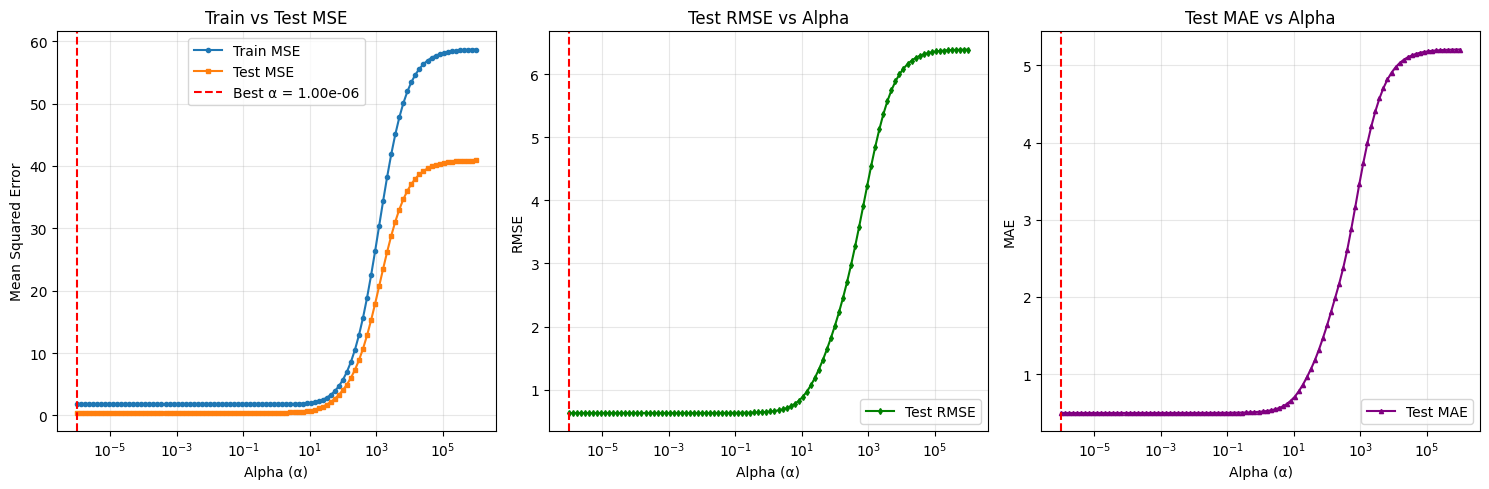


RIDGE REGRESSION – ALL FEATURES KEPT
Optimal Alpha           : 0.000001
Test  R²                : 0.989850
Test  RMSE              : 0.6290
Test  MAE               : 0.4964
Test  (Best Test MSE = 0.395605)

Final Model Coefficients (α = 0.000001):
Feature       Coefficient
----------------------------
Intercept          7.3410
Temperature       -0.0661
RH                -0.0197
Ws                 0.0067
Rain              -0.0089
FFMC              -0.5101
DMC                3.7564
ISI                5.0342
Region            -0.4119

Saved: scaler.pkl  &  ridge.pkl  → ready for deployment


In [9]:
# MODULE 3, 4 & 5 – RIDGE REGRESSION (ALL FEATURES KEPT)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')
df = df.drop(['day', 'month', 'year'], axis=1)


X = df.drop('FWI', axis=1)
y = df['FWI']

print("Features used (8 total):", list(X.columns))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

alphas = np.logspace(-6, 6, 100)    # wide range: 1e-6 → 1e6

train_mse_list = []
test_mse_list  = []
train_rmse_list = []
test_rmse_list  = []
train_mae_list  = []
test_mae_list   = []

for alpha in alphas:
    model = Ridge(alpha=alpha, max_iter=10000)
    model.fit(X_train_scaled, y_train)

    train_pred = model.predict(X_train_scaled)
    test_pred  = model.predict(X_test_scaled)

    train_mse_list.append(mean_squared_error(y_train, train_pred))
    test_mse_list.append(mean_squared_error(y_test,  test_pred))

    train_rmse_list.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_rmse_list.append(np.sqrt(mean_squared_error(y_test,  test_pred)))

    train_mae_list.append(mean_absolute_error(y_train, train_pred))
    test_mae_list.append(mean_absolute_error(y_test,  test_pred))

best_idx   = np.argmin(test_mse_list)
best_alpha = alphas[best_idx]

final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)

final_r2   = r2_score(y_test, y_pred_final)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_mae  = mean_absolute_error(y_test, y_pred_final)

# Save final model
with open('ridge.pkl', 'wb') as f:
    pickle.dump(final_model, f)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.semilogx(alphas, train_mse_list, label='Train MSE',  marker='o', markersize=3)
plt.semilogx(alphas, test_mse_list,  label='Test MSE',   marker='s', markersize=3)
plt.axvline(best_alpha, color='red', linestyle='--',
            label=f'Best α = {best_alpha:.2e}')
plt.xlabel('Alpha (α)')
plt.ylabel('Mean Squared Error')
plt.title('Train vs Test MSE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.semilogx(alphas, test_rmse_list, color='green', label='Test RMSE', marker='d', markersize=3)
plt.axvline(best_alpha, color='red', linestyle='--')
plt.xlabel('Alpha (α)')
plt.ylabel('RMSE')
plt.title('Test RMSE vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.semilogx(alphas, test_mae_list, color='purple', label='Test MAE', marker='^', markersize=3)
plt.axvline(best_alpha, color='red', linestyle='--')
plt.xlabel('Alpha (α)')
plt.ylabel('MAE')
plt.title('Test MAE vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('ridge_tuning_all_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("RIDGE REGRESSION – ALL FEATURES KEPT")
print("="*60)
print(f"Optimal Alpha           : {best_alpha:.6f}")
print(f"Test  R²                : {final_r2:.6f}")
print(f"Test  RMSE              : {final_rmse:.4f}")
print(f"Test  MAE               : {final_mae:.4f}")
print(f"Test  (Best Test MSE = {test_mse_list[best_idx]:.6f})")

print(f"\nFinal Model Coefficients (α = {best_alpha:.6f}):")
print(f"{'Feature':<12} {'Coefficient':>12}")
print("-"*28)
print(f"{'Intercept':<12} {final_model.intercept_:12.4f}")
for name, coef in zip(X.columns, final_model.coef_):
    print(f"{name:<12} {coef:12.4f}")

print("\nSaved: scaler.pkl  &  ridge.pkl  → ready for deployment")

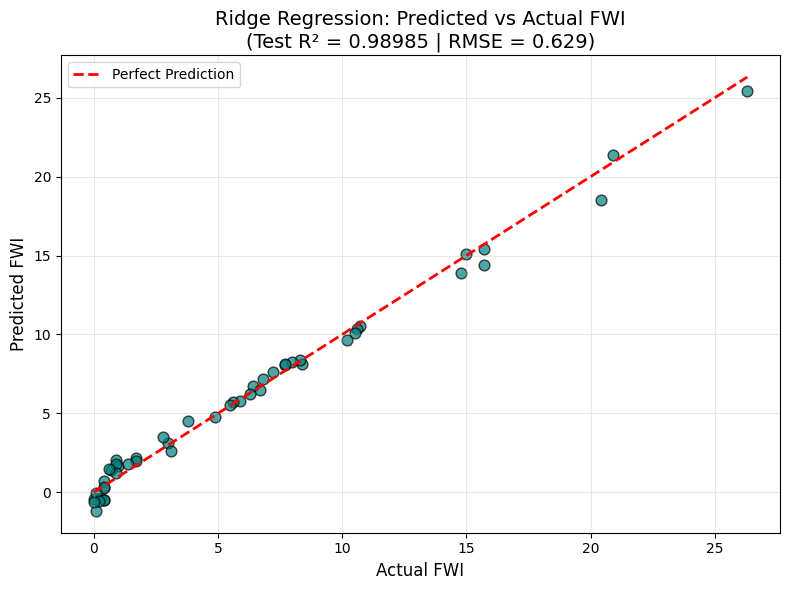

In [10]:
# --------------------- Predicted vs Actual Plot (Test Set) ---------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_final, alpha=0.7, color='teal', edgecolor='k', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual FWI', fontsize=12)
plt.ylabel('Predicted FWI', fontsize=12)
plt.title(f'Ridge Regression: Predicted vs Actual FWI\n'
          f'(Test R² = {final_r2:.5f} | RMSE = {final_rmse:.3f})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Optional: save the plot
plt.savefig('predicted_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()